In [1]:
import pandas as pd
import os
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io
from scipy.io import wavfile
%matplotlib inline

In [2]:
data_path = r"E:\personal\LiveProjects\speech_recognition\google_speech_new\google_speech\train"

train_csv = os.path.join(data_path, r"train.csv")
df = pd.read_csv(train_csv, encoding='utf-8')


In [3]:
audio_path = os.path.join(data_path, os.path.join(r"audio", df.iloc[1]['file_path']))
print(audio_path)
data, samplerate = librosa.load(audio_path)

D = librosa.stft(data)  # STFT of data
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

E:\personal\LiveProjects\speech_recognition\google_speech_new\google_speech\train\audio\bed/00f0204f_nohash_1.wav


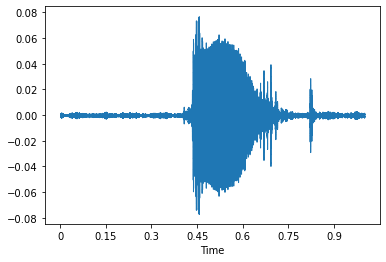

In [4]:
# Display spectrum

librosa.display.waveshow(data, sr=samplerate)

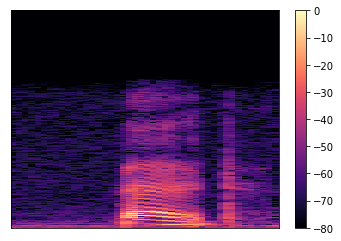

In [5]:
# Display spectogram

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, ax=ax)
fig.colorbar(img, ax=ax)

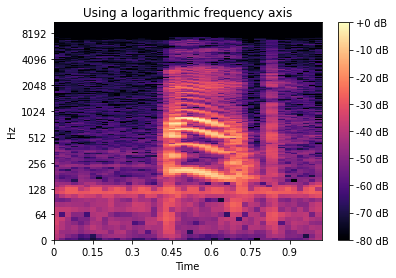

In [6]:
# Display spectogram at log frequency

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.colorbar(img, ax=ax, format="%+2.f dB")

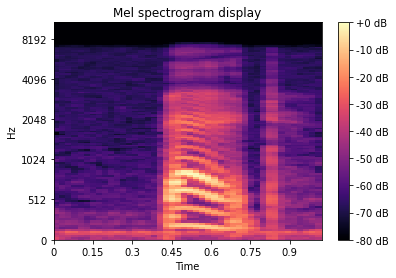

In [7]:
# Display mel spectogram

fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=data, sr=samplerate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

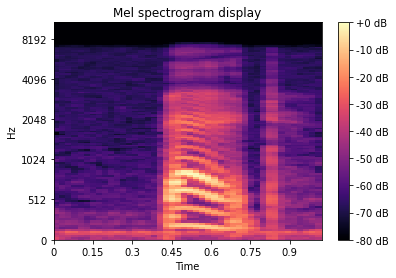

In [8]:
# Function to return Mel spectogram of given audio file
def get_mel_spectogram(data, samplerate):
    return librosa.feature.melspectrogram(y=data, sr=samplerate)

def get_mel_spectogram_from_audio_path(audio_path):
    data, samplerate = librosa.load(audio_path)
    M = get_mel_spectogram(data, samplerate)
    return M

def display_mel_spectogram(M):
    fig, ax = plt.subplots()
    M_db = librosa.power_to_db(M, ref=np.max)
    img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
    ax.set(title='Mel spectrogram display')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    
display_mel_spectogram(get_mel_spectogram_from_audio_path(audio_path))

In [10]:
# Generate mel spectogram for all training audio files
def make_1s_duration(data, duration):
    return librosa.effects.time_stretch(data, duration)

startTime = time.time()

for ind in df.index:
    fp = df.loc[ind, "file_path"]
    audio_path = os.path.join(data_path, os.path.join(r"audio", fp))
    #print(audio_path)
    data, samplerate = librosa.load(audio_path, sr=None)
    #print(samplerate)
    duration = librosa.get_duration(y=data, sr=samplerate)
    #print(duration)
    #print(data.shape[0])
    data_stretch = make_1s_duration(data, duration)
    #print(data_stretch.shape)
    M = get_mel_spectogram(data_stretch, samplerate)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 887.6350085735321


Load and get duration of all audios in training data set:
Execution time in seconds: 522.1043798923492

Load, get duration, get Mel spectogram of all audios in training data set:
Execution time in seconds: 887.6350085735321

Delta of getting Mel spectogram:
887.6350085735321 - 522.1043798923492 = 365.5306286811829 = ~6 minutes